### Neural Networks 
##### Scikit learn has a very limited support building neural networks compared to Deep learning frameworks such as TensorFlow and Pytorch

##### with scikit learn you can build MLP only fully-connected  NN with regularization 

# Regression using Neural Networks 

https://www.kaggle.com/chrisbow/2018-calorie-exercise-and-weight-changes

In [1]:
import sklearn 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [3]:
# shufle the data 
data =data.sample(frac =1).reset_index(drop=True)

In [4]:
data.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,8/12/2018,11.0,13.0,4.0,2676.0,2800.0,1.05,0.0,1.0,0.0,1.0,0.0,0.0,-12.0
1,12/14/2018,11.0,11.0,8.0,2648.0,2300.0,0.87,0.0,0.0,1.0,1.0,0.0,0.0,-8.0
2,9/23/2018,12.0,0.0,6.0,2694.0,5900.0,2.19,0.0,0.0,1.0,0.0,1.0,1.0,12.0
3,12/11/2018,11.0,13.0,4.0,2676.0,2300.0,0.86,1.0,1.0,1.0,0.0,0.0,1.0,-18.0
4,10/15/2018,12.0,3.0,0.0,2736.0,2300.0,0.84,1.0,1.0,0.0,0.0,0.0,1.0,-26.0
5,10/9/2018,12.0,0.0,0.0,2688.0,1400.0,0.52,0.0,1.0,0.0,0.0,0.0,0.0,-24.0
6,10/6/2018,12.0,3.0,6.0,2742.0,1500.0,0.55,0.0,1.0,1.0,0.0,0.0,0.0,-38.0
7,8/28/2018,11.0,13.0,2.0,2674.0,2100.0,0.79,1.0,1.0,0.0,0.0,0.0,0.0,-18.0
8,8/11/2018,11.0,11.0,2.0,2642.0,4000.0,1.51,0.0,0.0,0.0,1.0,0.0,0.0,34.0
9,11/25/2018,12.0,1.0,2.0,2706.0,6400.0,2.37,0.0,0.0,0.0,1.0,0.0,0.0,20.0


In [5]:
data.shape

(151, 14)

In [6]:
# check if the data has null values 
data[data.isnull().any(axis=1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

In [7]:
# drop all the values with null values 
data= data.dropna()

In [8]:
data[data.isnull().any(axis=1)].count()

Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [9]:
data.shape

(140, 14)

In [10]:
# quick exploration of the statistical properties of the data 
data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


Text(0, 0.5, 'change in weight ')

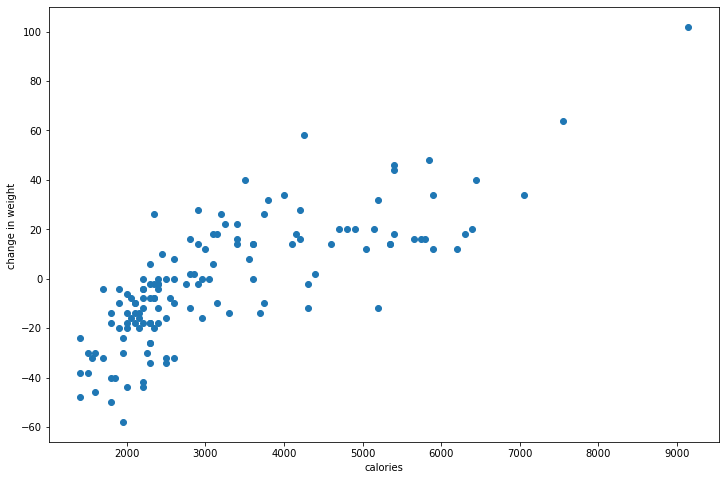

In [11]:
# explore the data to understand few relationship that exists
# between calories and weight change 
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(data['calories'], data['change'])
plt.xlabel('calories')
plt.ylabel('change in weight ')

###### the figure show relation ship between calories and change in weight 
###### notice a linear relationship with increase of calories follows increase of weight

Text(0, 0.5, 'change in weight ')

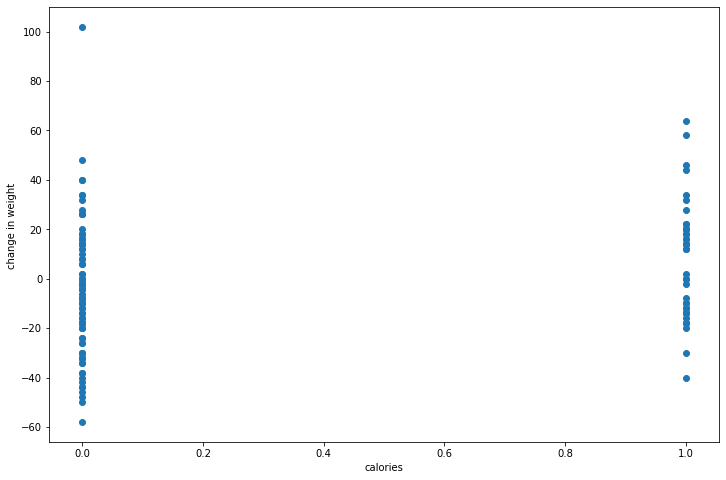

In [12]:
# explore the data to understand few relationship that exists 
# between wine and weight change 

fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(data['wine'], data['change'])
plt.xlabel('calories')
plt.ylabel('change in weight ')

###### wine is a categorical variable the day there is consumption of wine change of weigt is higher 

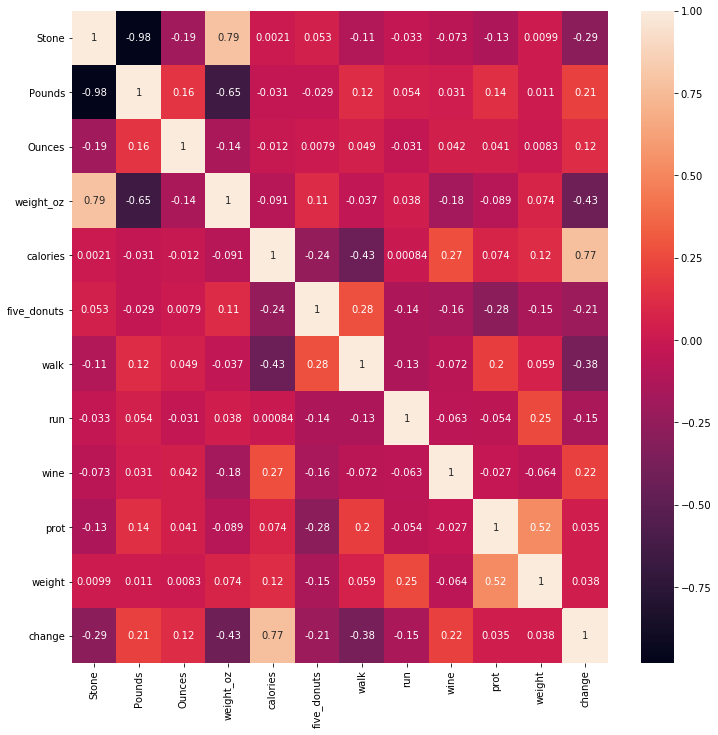

In [13]:
# set up a corelation matrix 
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data_corr, annot =True)

In [14]:
# set the target variable and features 
from sklearn.model_selection import train_test_split
x =data.drop(['change','Date','Stone','Pounds','Ounces'], axis =1)
y = data['change']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [15]:
 x_train.sample(5)

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight
97,2690.0,4700.0,1.75,0.0,0.0,0.0,1.0,0.0,1.0
85,2646.0,2800.0,1.06,1.0,0.0,0.0,0.0,0.0,0.0
72,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0
51,2710.0,4600.0,1.70,0.0,0.0,0.0,1.0,0.0,0.0
71,2656.0,2950.0,1.11,0.0,1.0,1.0,0.0,0.0,0.0


In [16]:
#standardize numeric features in the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
# instantiate a neural network 
# lbfgs optimizer used to train the neural network- converges well for small data
mlp_reg = MLPRegressor(activation ='relu',
                       hidden_layer_sizes = (2,6,4),
                      solver = 'lbfgs',
                      verbose= True,
                      max_iter =100)

In [19]:
mlp_reg.fit(x_train, y_train)

c:\users\bqlj2213\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(2, 6, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [20]:
 y_pred = mlp_reg.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
mlp_reg.score(x_train, y_train)

0.8215327007263249

In [22]:
r2_score(y_test,y_pred)

0.683238983228726

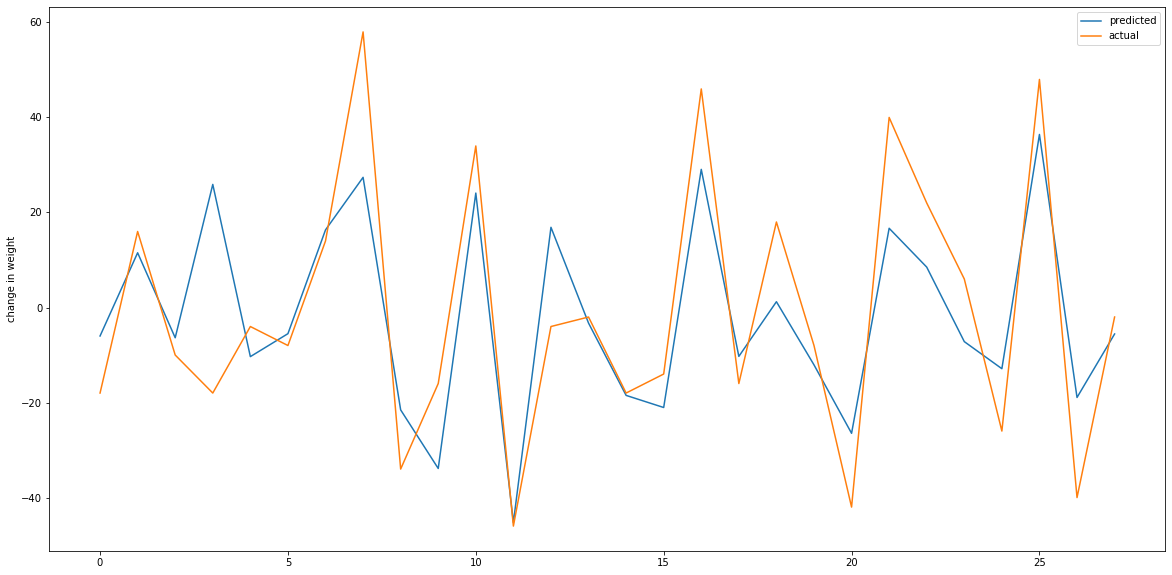

In [23]:
plt.figure(figsize =(20,10))
plt.plot(y_pred, label = 'predicted')
plt.plot(y_test.values, label = 'actual')

plt.ylabel('change in weight')
plt.legend()
plt.show()